In [16]:
import ydata_profiling  # Import the installed package
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('/Users/macbookair/Downloads/red_wine.csv')
profile = ProfileReport(df, title="Profiling Report")


In [17]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile.to_notebook_iframe()

profile.to_file("your_report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
data = pd.read_csv('/Users/macbookair/Downloads/red_wine.csv')

# Separate features and target variable
X = data.drop('target_column_name', axis=1)  # Features
y = data['target_column_name']  # Target variable

# Initialize models
baseline_model = DummyClassifier(strategy='most_frequent')
log_reg_model = LogisticRegression()
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
svm_linear_model = SVC(kernel='linear')
svm_rbf_model = SVC(kernel='rbf')
random_forest_model = RandomForestClassifier()

models = [baseline_model, log_reg_model, naive_bayes_model, decision_tree_model,
          svm_linear_model, svm_rbf_model, random_forest_model]

model_names = ['Baseline', 'Logistic Regression', 'Naive Bayes', 'Decision Tree',
               'SVM-Linear', 'SVM-RBF', 'Random Forest']

# List to hold results
results = {
    'Model': [],
    'Accuracy': [],
    'AUC': []
}

for model, name in zip(models, model_names):
    # Baseline accuracy and AUC
    if name == 'Baseline':
        y_pred_baseline = baseline_model.fit(X, y).predict(X)
        acc_baseline = accuracy_score(y, y_pred_baseline)
        auc_baseline = 0.5  # AUC for a random classifier is 0.5
        results['Model'].append(name)
        results['Accuracy'].append(acc_baseline)
        results['AUC'].append(auc_baseline)
    else:
        # 10-fold cross-validation
        acc_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
        auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
        results['Model'].append(name)
        results['Accuracy'].append(acc_scores.mean())
        results['AUC'].append(auc_scores.mean())

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)


KeyError: "['target_column_name'] not found in axis"

In [39]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the red-wine.csv dataset
data = pd.read_csv('/Users/macbookair/Downloads/red_wine.csv')

# Filter for specific columns
selected_columns = ['citric acid', 'sulphates', 'alcohol']
X = data[selected_columns]
y = data['type']  # Replace 'target_column_name' with the actual target column

# Models to evaluate
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear'),
    'SVM-RBF': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier()
}

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    if model_name == 'Baseline':
 # For Baseline, calculate accuracy and AUC differently
        baseline_acc = accuracy_score(y, model.fit(X, y).predict(X))
        print(f"{model_name} accuracy: {baseline_acc}")

        random_auc = 0.5  # Baseline AUC (random classifier AUC)
        print(f"{model_name} AUC: {random_auc}")

    else:
        cv_accuracy = cross_val_score(model, X, y, cv=KFold(n_splits=10), scoring='accuracy')
        mean_accuracy = cv_accuracy.mean()
        print(f"{model_name} accuracy: {mean_accuracy}")

        # Calculate AUC using cross-validation
        try:
            # Try predict_proba if available
            cv_probs = cross_val_predict(model, X, y, cv=KFold(n_splits=10), method='predict_proba')[:, 1]
            auc = roc_auc_score(y, cv_probs)
        except AttributeError:
            # Use decision function scores for models without predict_proba (e.g., SVC)
            cv_scores = cross_val_predict(model, X, y, cv=KFold(n_splits=10), method='decision_function')
            auc = roc_auc_score(y, cv_scores)
        print(f"{model_name} AUC: {auc}")


Baseline accuracy: 0.5288966725043783
Baseline AUC: 0.5
Logistic Regression accuracy: 0.7793708408953418
Logistic Regression AUC: 0.8696053570988946
Naive Bayes accuracy: 0.8215063520871142
Naive Bayes AUC: 0.8870602427435437
Decision Tree accuracy: 0.8091046581972172
Decision Tree AUC: 0.795963711563554
SVM-Linear accuracy: 0.7898971566848154
SVM-Linear AUC: 0.8707501415593687
SVM-RBF accuracy: 0.5426497277676952
SVM-RBF AUC: 0.8482360471700435
Random Forest accuracy: 0.8477011494252874
Random Forest AUC: 0.916166079913341


In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Load and prepare your data (Replace 'features' and 'target' with your data)
data = pd.read_csv('/Users/macbookair/Downloads/red_wine.csv')  # Load your data
X = data[['citric acid', 'sulphates', 'alcohol']]  # Feature columns
y = data['type']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: y_true takes value in {'high', 'low'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

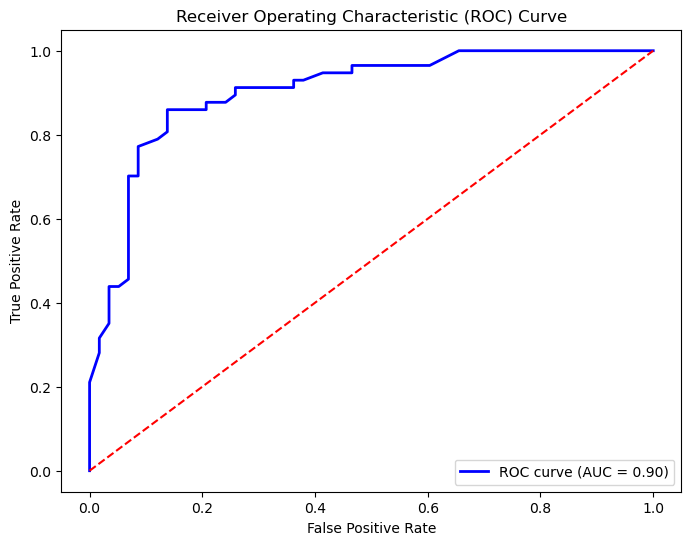

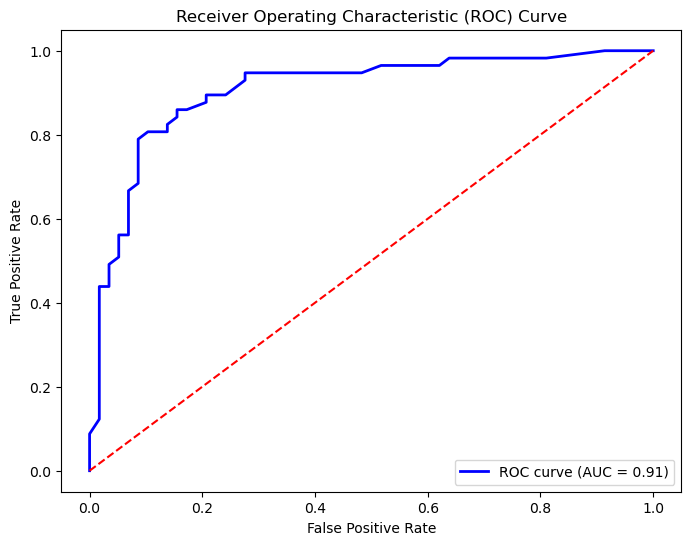

In [42]:
import pandas as pd
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and prepare your data (Replace 'features' and 'target' with your data)
data = pd.read_csv('/Users/macbookair/Downloads/red_wine.csv')  # Load your data
X = data[['citric acid', 'sulphates', 'alcohol']]  # Feature columns
y = data['type']  # Target column


# Convert categorical labels to numerical values
le = LabelEncoder()
y = le.fit_transform(y)  # Converts 'high' and 'low' to 1 and 0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [44]:
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the red-wine.csv dataset
data = pd.read_csv('/Users/macbookair/Downloads/white_wine.csv')

# Filter for specific columns
selected_columns = ['citric acid', 'sulphates', 'alcohol']
X = data[selected_columns]
y = data['type']  # Replace 'target_column_name' with the actual target column

# Models to evaluate
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Naive Bayes': GaussianNB(),
}

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    if model_name == 'Baseline':
 # For Baseline, calculate accuracy and AUC differently
        baseline_acc = accuracy_score(y, model.fit(X, y).predict(X))
        print(f"{model_name} accuracy: {baseline_acc}")

        random_auc = 0.5  # Baseline AUC (random classifier AUC)
        print(f"{model_name} AUC: {random_auc}")

    else:
        cv_accuracy = cross_val_score(model, X, y, cv=KFold(n_splits=10), scoring='accuracy')
        mean_accuracy = cv_accuracy.mean()
        print(f"{model_name} accuracy: {mean_accuracy}")

        # Calculate AUC using cross-validation
        try:
            # Try predict_proba if available
            cv_probs = cross_val_predict(model, X, y, cv=KFold(n_splits=10), method='predict_proba')[:, 1]
            auc = roc_auc_score(y, cv_probs)
        except AttributeError:
            # Use decision function scores for models without predict_proba (e.g., SVC)
            cv_scores = cross_val_predict(model, X, y, cv=KFold(n_splits=10), method='decision_function')
            auc = roc_auc_score(y, cv_scores)
        print(f"{model_name} AUC: {auc}")



Baseline accuracy: 0.782051282051282
Baseline AUC: 0.5
Logistic Regression accuracy: 0.7821428571428571
Logistic Regression AUC: 0.8736740597878496
Naive Bayes accuracy: 0.8446428571428571
Naive Bayes AUC: 0.613307618129219
Decision Tree accuracy: 0.8607142857142858
Decision Tree AUC: 0.7025072324011572
SVM-Linear accuracy: 0.7821428571428571
SVM-Linear AUC: 0.9402121504339441
SVM-RBF accuracy: 0.7821428571428571
SVM-RBF AUC: 0.62198649951784
Random Forest accuracy: 0.8714285714285713
Random Forest AUC: 0.9484088717454194
